In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt


stock = 'GOOGL'
start = dt.datetime(2000, 1, 1)
end = dt.datetime.today()

df = yf.download(stock, start, end)

C:\Users\jaraneses\AppData\Local\Temp\ipykernel_28228\2393285748.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2004-08-19,2.496041,2.588579,2.387085,2.487584,893181924
2004-08-20,2.694301,2.713456,2.500021,2.512708,456686856
2004-08-23,2.721416,2.822910,2.712710,2.754999,365122512
2004-08-24,2.608728,2.776143,2.576390,2.767188,304946748
2004-08-25,2.636839,2.686591,2.584102,2.610968,183772044


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2025-08-29,212.910004,214.649994,210.199997,210.509995,39728400
2025-09-02,211.350006,211.679993,206.199997,208.440002,47523000
2025-09-03,230.660004,231.309998,224.789993,226.210007,103336100
2025-09-04,232.300003,232.369995,226.110001,229.649994,51684200
2025-09-05,235.000000,235.759995,231.899994,232.199997,46566300


In [5]:
df.shape

(5296, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5296 entries, 2004-08-19 to 2025-09-05
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   5296 non-null   float64
 1   (High, GOOGL)    5296 non-null   float64
 2   (Low, GOOGL)     5296 non-null   float64
 3   (Open, GOOGL)    5296 non-null   float64
 4   (Volume, GOOGL)  5296 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 248.2 KB


In [7]:
df.isnull().sum()

Price   Ticker
Close   GOOGL     0
High    GOOGL     0
Low     GOOGL     0
Open    GOOGL     0
Volume  GOOGL     0
dtype: int64

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,5296.000000,5296.000000,5296.000000,5296.000000,5.296000e+03
mean,51.818298,52.355367,51.254553,51.798667,1.130912e+08
std,50.786986,51.331362,50.206729,50.746844,1.452672e+08
min,2.487833,2.530868,2.387085,2.467434,9.312000e+06
25%,13.243708,13.370575,13.116033,13.264604,3.036400e+07
50%,28.863165,29.094399,28.573003,28.877959,5.409000e+07
75%,71.911850,72.352565,71.061818,72.028648,1.341467e+08
max,235.000000,235.759995,231.899994,232.199997,1.643023e+09


In [9]:
df = df.reset_index()

In [10]:
df.shape

(5296, 6)

In [11]:
df.columns

MultiIndex([(  'Date',      ''),
            ( 'Close', 'GOOGL'),
            (  'High', 'GOOGL'),
            (   'Low', 'GOOGL'),
            (  'Open', 'GOOGL'),
            ('Volume', 'GOOGL')],
           names=['Price', 'Ticker'])

In [12]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data = [go.Candlestick(x = df['Date'], open = df['Open'],
                                       high = df['High'],
                                       low = df['Low'],
                                       close = df['Close'])])

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [13]:
df = df.drop(columns = 'Date')

C:\Users\jaraneses\AppData\Local\Temp\ipykernel_28228\3233817741.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [14]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,2.496041,2.588579,2.387085,2.487584,893181924
1,2.694301,2.713456,2.500021,2.512708,456686856
2,2.721416,2.822910,2.712710,2.754999,365122512
3,2.608728,2.776143,2.576390,2.767188,304946748
4,2.636839,2.686591,2.584102,2.610968,183772044


<function matplotlib.pyplot.show(close=None, block=None)>

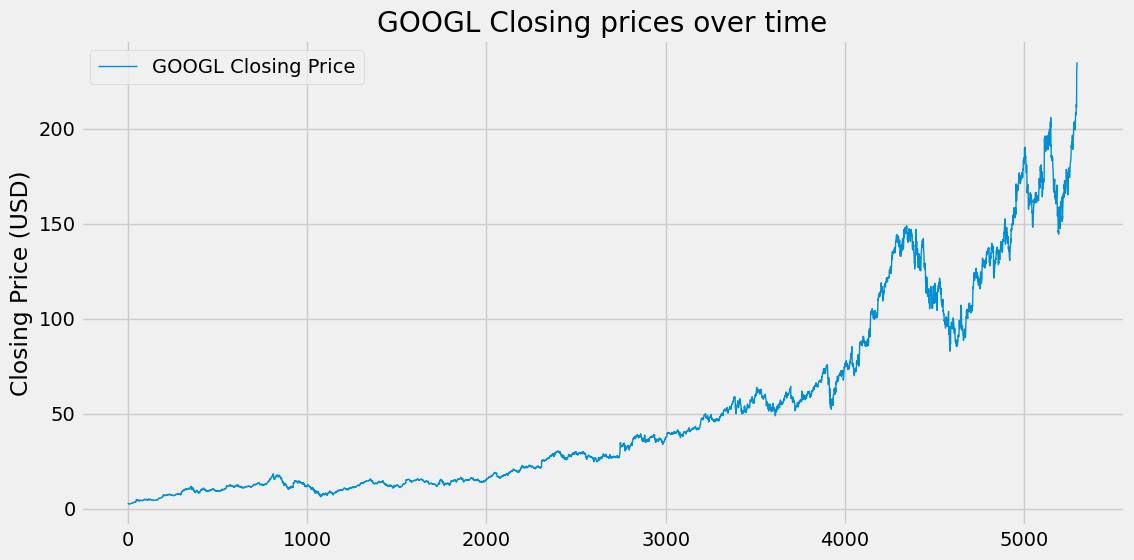

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

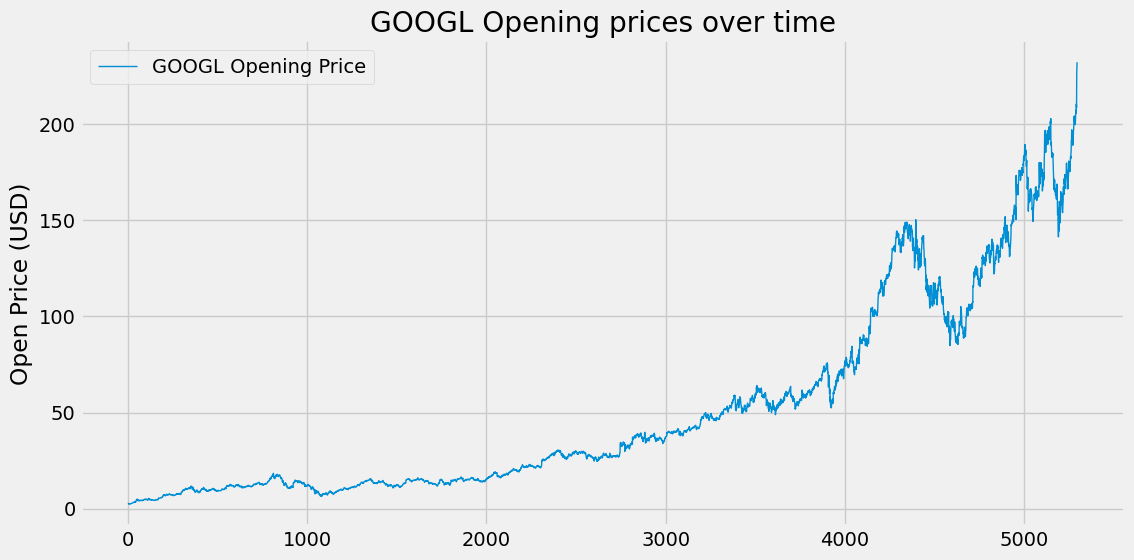

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.ylabel('Open Price (USD)')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

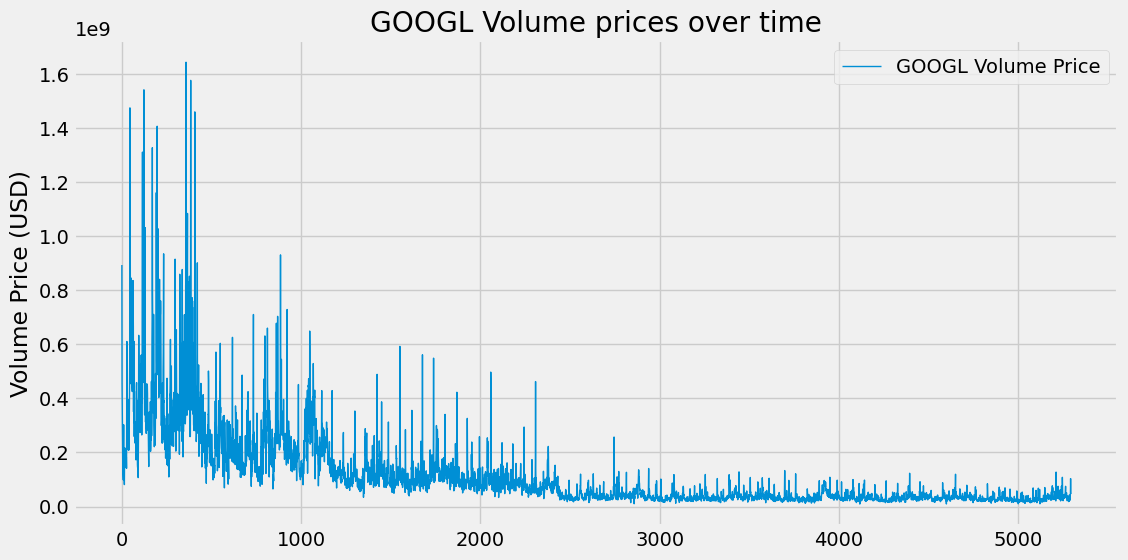

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df['Volume'], label = f'{stock} Volume Price', linewidth = 1)
plt.title(f'{stock} Volume prices over time')
plt.ylabel('Volume Price (USD)')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

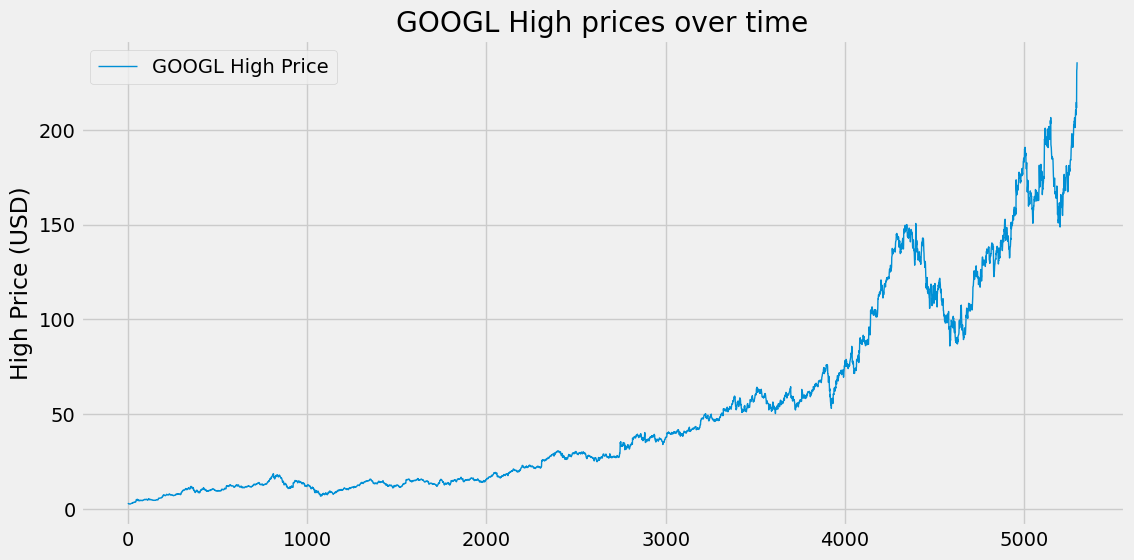

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.ylabel('High Price (USD)')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

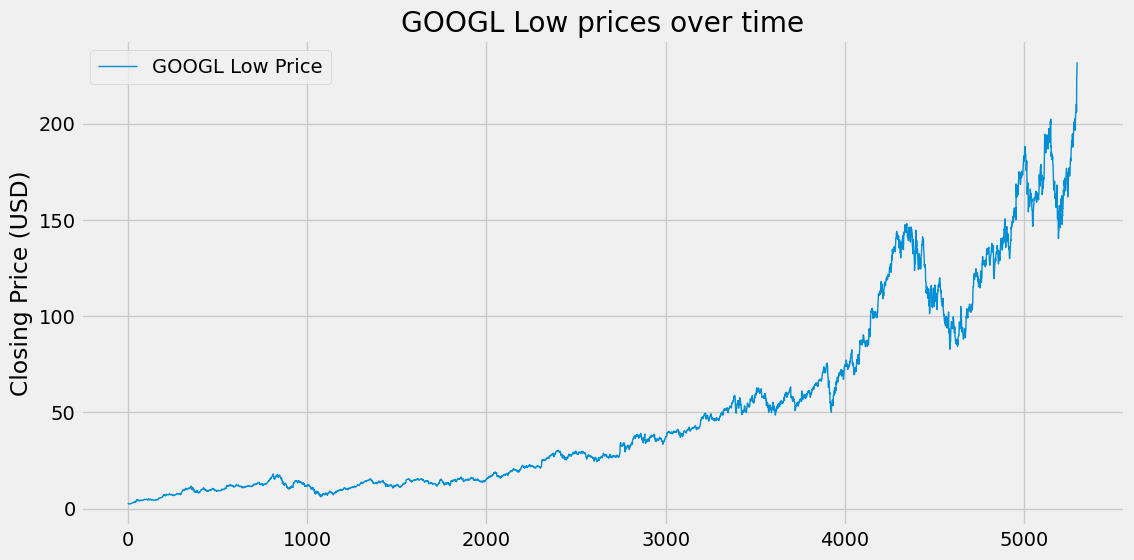

In [19]:
plt.figure(figsize = (12,6))
plt.plot(df['Low'], label = f'{stock} Low Price', linewidth = 1)
plt.title(f'{stock} Low prices over time')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show

In [20]:
ma100 = df.Close.rolling(100).mean()

In [21]:
ma100

Ticker,GOOGL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5291,176.959252
5292,177.627502
5293,178.348921
5294,179.145569


In [22]:
ma200 = df.Close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

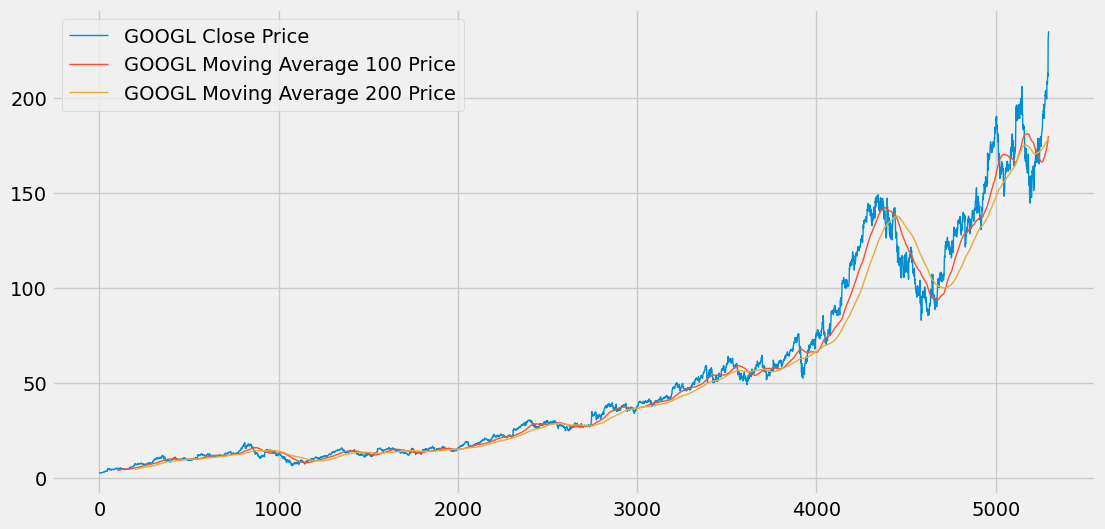

In [23]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'], label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show

In [24]:
ema100 = df.Close.ewm(span = 100, adjust= False).mean()

In [25]:
ema200 = df.Close.ewm(span = 200, adjust= False).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

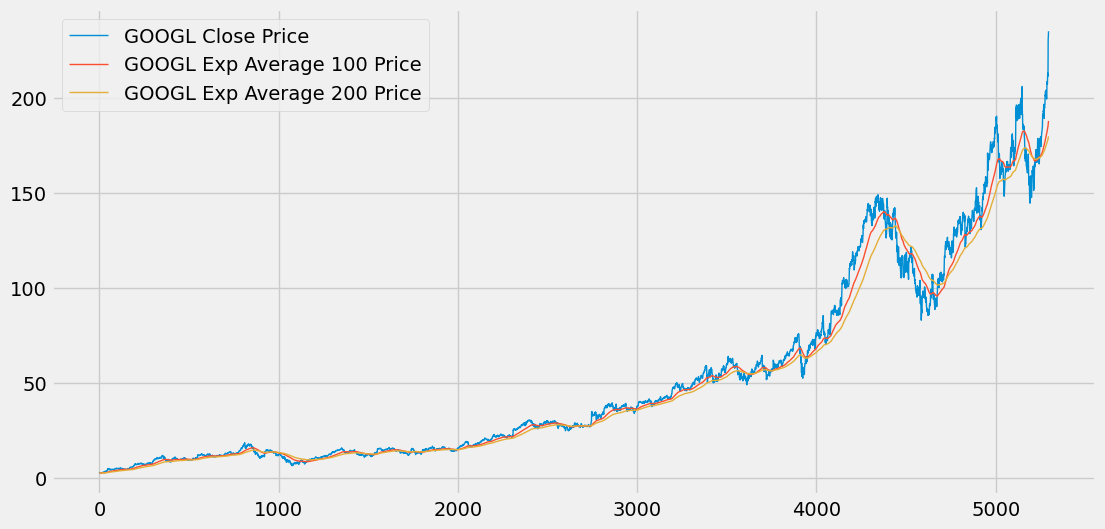

In [26]:
plt.figure(figsize = (12,6))
plt.plot(df['Close'], label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp Average 200 Price', linewidth = 1)
plt.legend()
plt.show

In [27]:
# Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

In [28]:
data_training.shape

(3707, 1)

In [29]:
data_testing.shape

(1589, 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [31]:
data_training_array = scaler.fit_transform(data_training)

In [32]:
data_training_array.shape[0]

3707

In [33]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i -100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [34]:
x_train.shape

(3607, 100, 1)

## Model Building

In [35]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [36]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\jaraneses\OneDrive - 2X LLC\Codes\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 34s 196ms/step - loss: 0.0201
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 213ms/step - loss: 0.0050
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - loss: 0.0046
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 201ms/step - loss: 0.0040
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 213ms/step - loss: 0.0038
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 208ms/step - loss: 0.0034
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - loss: 0.0033
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 188ms/step - loss: 0.0030
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 206ms/step - loss: 0.0028
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - loss: 0.0027
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - loss: 0.0029
Epoch 12/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 130ms/step - loss: 0.0025
Epoch 13/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - loss: 0.0024
Epoch 14/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - loss: 0.0021
Epoch 15/50
113

In [39]:
past_100_days = data_training.tail(100)

In [40]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [41]:
input_data = scaler.fit_transform(final_df)

In [42]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i -100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [43]:
x_test.shape

(1589, 100, 1)

In [44]:
y_predicted = model.predict(x_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step


In [45]:
y_predicted.shape

(1589, 1)

In [ ]:
scaler_1 = scaler.scale_

np.float64(0.005374610190887807)

In [54]:
scaler_factor = 1 / scaler_1
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

In [57]:
y_test

array([ 1404.88491306,  1296.4111862 ,  1721.24384484, ...,
       33810.82578941, 34115.96408436, 34618.32553055], shape=(1589,))

<function matplotlib.pyplot.show(close=None, block=None)>

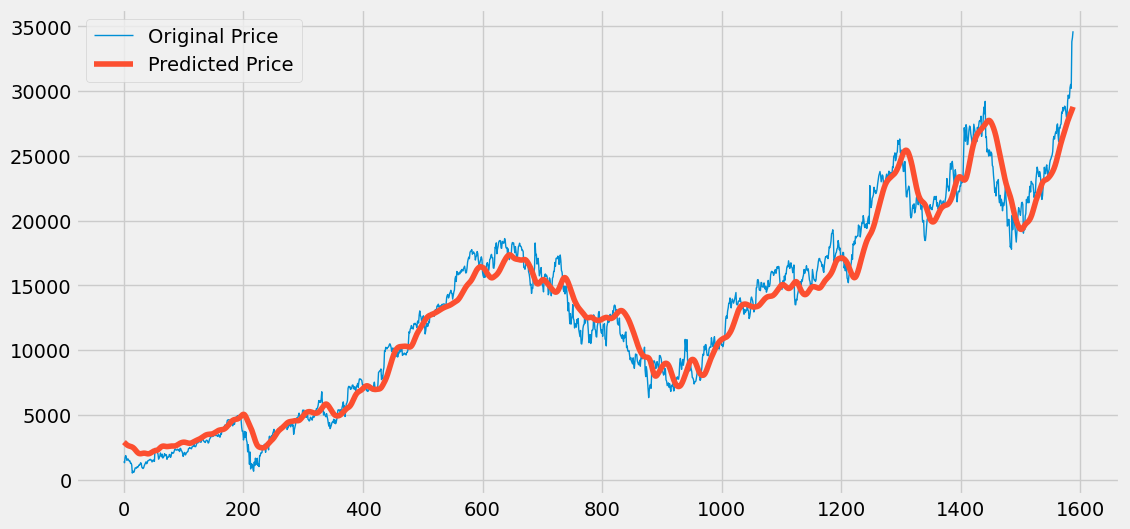

In [58]:
plt.figure(figsize = (12,6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price')

plt.legend()
plt.show

In [49]:
model.save('stock_dl.h5')

In [50]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Flatten to 1D
yt = np.asarray(y_test).ravel()
yp = np.asarray(y_predicted).ravel()

# Metrics
mae  = mean_absolute_error(yt, yp)
rmse = np.sqrt(mean_squared_error(yt, yp))
dir_acc = (np.sign(np.diff(yt)) == np.sign(np.diff(yp))).mean() if len(yt) > 1 else float('nan')

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Directional accuracy: {dir_acc:.2%}")


MAE:  5.82
RMSE: 7.45
Directional accuracy: 51.07%
